In [1]:
import numpy as np
import math as m
import random
import pandas as pd
import csv
import matplotlib.pyplot as plt
from copy import deepcopy

### Read Data CSV

In [4]:
data = pd.read_csv('influencers.csv')

In [5]:
dataList = data.values.tolist()

### Fuzzification

### Fungsi Keanggotaan Follower

In [6]:
def faFollower(x,batasFoll):
    listfaF = []
    if x>=0 and x<=batasFoll[0] :
        listfaF.append([1, linguistikI[0]])
    elif x>batasFoll[0] and x<= batasFoll[1] :
        listfaF.append([(batasFoll[1]-x)/(batasFoll[1]-batasFoll[0]), linguistikI[0]])
    
    if x>= batasFoll[0] and x< batasFoll[1] :
        listfaF.append([1-((batasFoll[1]-x)/(batasFoll[1]-batasFoll[0])), linguistikI[1]])
    elif x>= batasFoll[1] and x<= batasFoll[2] :
        listfaF.append([1, linguistikI[1]])
    elif x>batasFoll[2] and x<= batasFoll[3] :
        listfaF.append([(batasFoll[3]-x)/(batasFoll[3]-batasFoll[2]), linguistikI[1]])
    
    if x>=batasFoll[2] and x<batasFoll[3] :
        listfaF.append([1-((batasFoll[3]-x)/(batasFoll[3]-batasFoll[2])), linguistikI[2]])
    elif x>=batasFoll[3] :
        listfaF.append([1, linguistikI[2]])
    
    return listfaF

### Fungsi Keanggotaan Engagment

In [7]:
def faEngagment(x,batasEng):
    listfaE = []
    if x>=0 and x<=batasEng[0] :
        listfaE.append([1, linguistikI[0]])
    elif x>batasEng[0] and x<= batasEng[1] :
        listfaE.append([(batasEng[1]-x)/(batasEng[1]-batasEng[0]), linguistikI[0]])
    
    if x>= batasEng[0] and x< batasEng[1] :
        listfaE.append([1-((batasEng[1]-x)/(batasEng[1]-batasEng[0])), linguistikI[1]])
    elif x>= batasEng[1] and x<= batasEng[2] :
         listfaE.append([1, linguistikI[1]])
    elif x>batasEng[2] and x<= batasEng[3] :
        listfaE.append([(batasEng[3]-x)/(batasEng[3]-batasEng[2]), linguistikI[1]])
    
    if x>=batasEng[2] and x<batasEng[3] :
        listfaE.append([1-((batasEng[3]-x)/(batasEng[3]-batasEng[2])), linguistikI[2]])
    elif x>=batasEng[3] :
        listfaE.append([1, linguistikI[2]])
    
    return listfaE

### Fungsi Keanggotaan Output

In [8]:
def faOutput(x, batasHasil):
    listfaO = []
    if x>=0 and x<=batasOut[0] :
        listfaO.append(batasHasil[0])
    elif x>batasOut[0] and x<= batasOut[1] :
        listfaO.append((batasOut[1]-x)/(batasOut[1]-batasOut[0]))
    
    if x>= batasOut[0] and x< batasOut[1] :
        listfaO.append(1-((batasOut[1]-x)/(batasOut[1]-batasOut[0])))
    elif x>= batasOut[1] and x<= batasOut[2] :
         listfaO.append(batasHasil[1])
    elif x>batasOut[2] and x<= batasOut[3] :
        listfaO.append((batasOut[3]-x)/(batasOut[3]-batasOut[2]))
    
    if x>=batasOut[2] and x<batasOut[3] :
        listfaO.append(1-((batasOut[3]-x)/(batasOut[3]-batasOut[2])))
    elif x>=batasOut[3] :
        listfaO.append(batasHasil[0])
    
    return listfaO

### Rule

In [9]:
def Rule(follower, engagment):
    if follower=='Rendah' and engagment=='Rendah':
        return linguistikO[hasilO[0][0]]
    elif follower=='Rendah' and engagment=='Sedang':
        return linguistikO[hasilO[0][1]]
    elif follower=='Rendah' and engagment=='Tinggi':
        return linguistikO[hasilO[0][2]]
    elif follower=='Sedang' and engagment=='Rendah':
        return linguistikO[hasilO[1][0]]
    elif follower=='Sedang' and engagment=='Sedang':
        return linguistikO[hasilO[1][1]]
    elif follower=='Sedang' and engagment=='Tinggi':
        return linguistikO[hasilO[1][2]]
    elif follower=='Tinggi' and engagment=='Rendah':
        return linguistikO[hasilO[2][0]]
    elif follower=='Tinggi' and engagment=='Sedang':
        return linguistikO[hasilO[2][1]]
    elif follower=='Tinggi' and engagment=='Tinggi':
        return linguistikO[hasilO[2][2]]

### Inference

In [10]:
def inference(x,batasFoll,batasEng):
    listRule = []
    listNilai = []
    follower = faFollower(dataList[x][1], batasFoll)
    engagment = faEngagment(dataList[x][2], batasEng)
    for fol in follower:
        for eng in engagment:
            rule = Rule(fol[1],eng[1])
            nilai = min(fol[0],eng[0])
            if rule not in listRule:
                listRule.append(rule)
                listNilai.append(nilai)
            else:
                for i in range(len(listRule)):
                    if rule==listRule[i]:
                        listNilai[i] == max(listNilai[i],nilai)
    listinf = zip(listRule,listNilai)
    return listinf

### Defuzzification

In [11]:
def defuzzification(batasHasil):
    listHasil = []
    jumHasil = 0
    jumTitik = 0
    for i in range (len(titik)):
        listHasil.append(faOutput(titik[i],batasHasil))
        jumHasil += titik[i]*listHasil[i][0]
        jumTitik += listHasil[i][0]
    
    return(jumHasil/jumTitik)

### Akurasi

In [12]:
def akurasi(hasil):
    listPerkalian = []
    count = 0
    for i in range (len(dataList)):
        n = dataList[i][1]*dataList[i][2]
        listPerkalian.append([n,i+1])
    sort = sorted(listPerkalian, reverse=True)
    for i in range (20):
        for j in range (20):
            if hasil[i][1] == sort[j][1]:
                count += 1
    return (count/20)*100

### Grafik

In [13]:
def grafik(batas, judul, linguistik, bakhir):
    plt.title(judul)
    plt.plot([0,batas[0],batas[1]],[1,1,0],label = linguistik[0])
    plt.plot([batas[0],batas[1],batas[2],batas[3]],[0,1,1,0],label = linguistik[1])
    plt.plot([batas[2],batas[3],bakhir],[0,1,1],label = linguistik[2])
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
    plt.show()

## Main Program

### Initialisasi

In [14]:
linguistikI = ['Rendah','Sedang','Tinggi']
linguistikO = ['Tolak','Pertimbangkan','Diterima']

batasFoll = [24000, 47000, 65000, 75000]
batasEng = [2.9, 4.7, 5.7, 6.5]
batasOut = [22, 42, 68, 74]
hasilO = [[0,0,1],[0,1,2],[1,2,2]]
titik = [10, 20, 30, 40, 50, 60, 70, 80, 90]

### Grafik Fungsi Keanggotaan

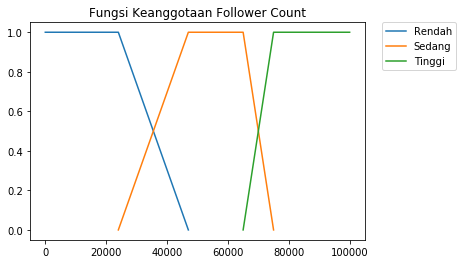

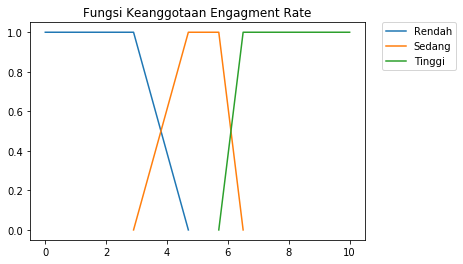

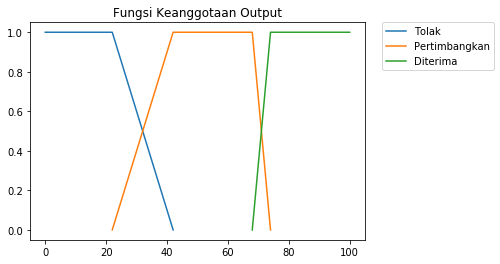

In [15]:
grafik(batasFoll,'Fungsi Keanggotaan Follower Count',linguistikI,100000)
grafik(batasEng,'Fungsi Keanggotaan Engagment Rate',linguistikI,10)
grafik(batasOut,'Fungsi Keanggotaan Output',linguistikO,100)

### Proses

In [16]:
listHasilDef = []
for i in range (len(dataList)):
    inf = inference(i,batasFoll,batasEng)
    plingo = len(linguistikO)
    batasHasil = [0]*plingo
    for hinf in inf:
        for j in range(plingo):
            if hinf[0] == linguistikO[j]:
                batasHasil[j] = hinf[1]
    listHasilDef.append([defuzzification(batasHasil),i+1])

In [17]:
cek = sorted(listHasilDef, reverse=True)
acc = akurasi(cek)
listRecord = []
for i in range (20):
    listRecord.append(cek[i][1])
print('Record  = ',listRecord)
print('Akurasi = ',acc,'%')

Record  =  [100, 60, 48, 39, 25, 19, 75, 72, 61, 41, 74, 76, 67, 36, 2, 53, 93, 59, 13, 11]
Akurasi =  100.0 %


### Write Records To CSV

In [18]:
with open('hasilRecord.csv', "w") as outfile:
    wr = csv.writer(outfile, dialect='excel')
    wr.writerow(['Nomor Record'])
    for word in listRecord:
        wr.writerow([word])